In [67]:
import sys 
sys.path.append('..//utils')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MiguelTK import *
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('data/facturacion.csv')
df.head()

,fecha_de_factura,factura,codigo_de_stock,producto,cantidad,precio,id_del_cliente,ciudad
0,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,Lleida
1,2020-12-16,539294,47574A,ENGLISH ROSE SCENTED HANGING FLOWER,1.0,4.25,7d08cdc9,Madrid
2,2020-10-18,571714,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,NaN,NaN,df301f04,Oviedo
3,2022-09-08,566060,82484,WOOD BLACK BOARD ANT WHITE FINISH,2.0,16.63,a70cf1ee,Valencia
4,2022-12-06,537237,22208,WOOD STAMP SET THANK YOU,3.0,3.36,b0e56ea7,Alicante


In [69]:
df.ciudad.unique()

array(['Lleida', 'Madrid', 'Oviedo', 'Valencia', 'Alicante', 'Móstoles',
       'Girona', 'Avilés', 'Castellón', 'Alcalá de Henares', 'Barcelona',
       'Gijón', 'madrid', 'Madrid '], dtype=object)

In [70]:
df['ciudad'] = (
    df
    ['ciudad']
    .str.lstrip()
    .str.rstrip()
    .str.upper()
)

In [71]:
df.ciudad.unique()

array(['LLEIDA', 'MADRID', 'OVIEDO', 'VALENCIA', 'ALICANTE', 'MÓSTOLES',
       'GIRONA', 'AVILÉS', 'CASTELLÓN', 'ALCALÁ DE HENARES', 'BARCELONA',
       'GIJÓN'], dtype=object)

In [72]:
customer_prof = pd.read_csv('data/customer.csv')[['Customer ID','Age','Gender','Subscription Status']]
df_integrado = pd.merge(
    df,
    customer_prof,
    how = 'inner',
    left_on = 'id_del_cliente',
    right_on = 'Customer ID'
).drop(columns='Customer ID')
df_integrado.head()

,fecha_de_factura,factura,codigo_de_stock,producto,cantidad,precio,id_del_cliente,ciudad,Age,Gender,Subscription Status
0,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,LLEIDA,48,Male,Yes
1,2020-12-16,539294,47574A,ENGLISH ROSE SCENTED HANGING FLOWER,1.0,4.25,7d08cdc9,MADRID,29,Male,No
2,2020-10-18,571714,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,NaN,NaN,df301f04,OVIEDO,41,Male,Yes
3,2022-09-08,566060,82484,WOOD BLACK BOARD ANT WHITE FINISH,2.0,16.63,a70cf1ee,VALENCIA,67,Female,No
4,2022-12-06,537237,22208,WOOD STAMP SET THANK YOU,3.0,3.36,b0e56ea7,ALICANTE,49,Male,No


In [73]:
df_integrado.rename(
    columns = {'Age':'age','Gender':'genero','Subscription Status':'suscripcion'},
    inplace = True
)

In [74]:
df_integrado['suscripcion'].unique()

array(['Yes', 'No'], dtype=object)

In [75]:
df_categoria = pd.read_csv('data/categoria_producto.csv')
df_categoria.head()

,Category,codigo_de_stock
0,Foodies,85123a
1,Moda,71053
2,Moda,84406B
3,Aventura,84029G
4,Tecnologia,84029E


In [76]:
df_integrado = pd.merge(
    df_integrado,
    df_categoria,
    how = 'inner',
    on = 'codigo_de_stock'
)
df_integrado.head()

,fecha_de_factura,factura,codigo_de_stock,producto,cantidad,precio,id_del_cliente,ciudad,age,genero,suscripcion,Category
0,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,LLEIDA,48,Male,Yes,Moda
1,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,LLEIDA,48,Male,Yes,Health & Wellness
2,2020-12-16,539294,47574A,ENGLISH ROSE SCENTED HANGING FLOWER,1.0,4.25,7d08cdc9,MADRID,29,Male,No,Tecnologia
3,2020-10-18,571714,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,NaN,NaN,df301f04,OVIEDO,41,Male,Yes,Tecnologia
4,2022-09-08,566060,82484,WOOD BLACK BOARD ANT WHITE FINISH,2.0,16.63,a70cf1ee,VALENCIA,67,Female,No,Aventura


In [77]:
df_integrado['Category'].unique()

array(['Moda', 'Health & Wellness', 'Tecnologia', 'Aventura', 'Foodies'],
      dtype=object)

In [78]:
df = df_integrado

In [ ]:
df['age_cat'] = pd.qcut(df['age'],5)

In [107]:
df['total'] = df['cantidad']*df['precio']

In [127]:
df['mes'] = df['fecha_de_factura'].dt.month.astype(str).str.zfill(2) + '/' + df['fecha_de_factura'].dt.year.astype(str)

In [131]:
df['n_compras'] = (
    df
    .groupby(['id_del_cliente','mes'],as_index=False)
    .transform('size')
)

## Análisis exploratorio de los datos

In [158]:
num_vars = df.select_dtypes('number').melt()
num_vars.head()

,variable,value
0,cantidad,1.0
1,cantidad,1.0
2,cantidad,1.0
3,cantidad,NaN
4,cantidad,2.0


AttributeError: 'FacetGrid' object has no attribute 'map_grid'

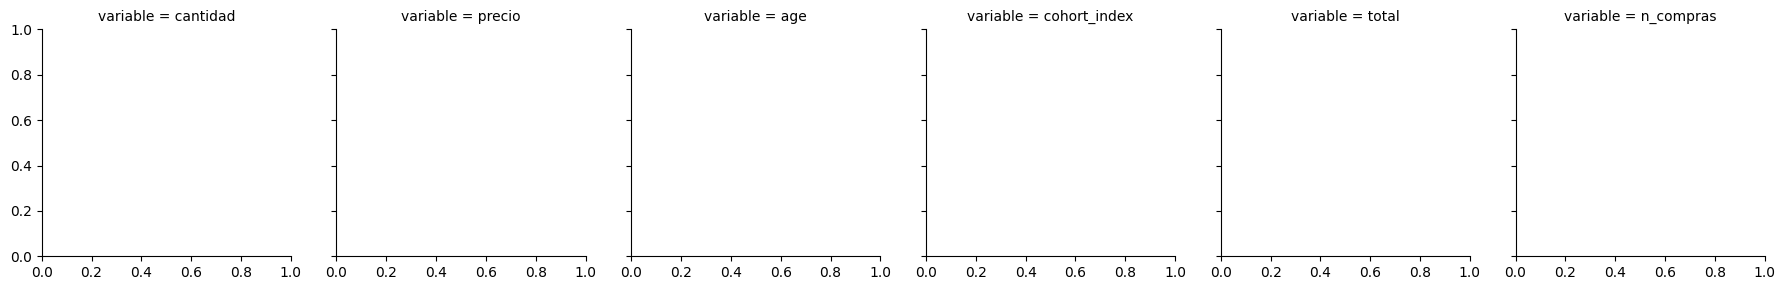

In [159]:
grid = sns.FacetGrid(num_vars,col='variable')
grid.map_grid()

## Análisis de cohortes

In [79]:
df.dropna(subset='id_del_cliente',inplace=True)

In [80]:
df['fecha_de_factura'] = pd.to_datetime(df['fecha_de_factura'])

In [81]:
primera_compra = (
    df
    .groupby('id_del_cliente')
    ['fecha_de_factura']
    .transform('min')
)

In [82]:
cohort_month = primera_compra.dt.month
cohort_year = primera_compra.dt.year
df['mes_cohorte'] = cohort_month.astype(str).str.zfill(2) + '/' + cohort_year.astype(str)
month_diff = df['fecha_de_factura'].dt.month - cohort_month
year_diff = df['fecha_de_factura'].dt.year - cohort_year
df['cohort_index'] = year_diff * 12 + month_diff

In [83]:
df.head()

,fecha_de_factura,factura,codigo_de_stock,producto,cantidad,precio,id_del_cliente,ciudad,age,genero,suscripcion,Category,mes_cohorte,cohort_index
0,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,LLEIDA,48,Male,Yes,Moda,01/2020,23
1,2021-12-05,537196,21811,CHRISTMAS HANGING HEART WITH BELL,1.0,1.25,c8a66fe3,LLEIDA,48,Male,Yes,Health & Wellness,01/2020,23
2,2020-12-16,539294,47574A,ENGLISH ROSE SCENTED HANGING FLOWER,1.0,4.25,7d08cdc9,MADRID,29,Male,No,Tecnologia,01/2020,11
3,2020-10-18,571714,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,NaN,NaN,df301f04,OVIEDO,41,Male,Yes,Tecnologia,02/2020,8
4,2022-09-08,566060,82484,WOOD BLACK BOARD ANT WHITE FINISH,2.0,16.63,a70cf1ee,VALENCIA,67,Female,No,Aventura,01/2020,32


### Agrupación por fechas de primera compra

In [118]:
cohortes_fecha = (
    df
    .pivot_table(
        index = 'mes_cohorte',
        columns = 'cohort_index',
        values = 'id_del_cliente',
        aggfunc = 'nunique'
    )
)
cohortes_fecha = cohortes_fecha.divide(cohortes_fecha[0],axis=0)
cohortes_fecha.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mes_cohorte,,,,,,,,,,,,,,,,,,,,,
01/2020,1.0,0.673575,0.777202,0.732297,0.801382,0.770294,0.751295,0.754750,0.849741,0.837651,...,0.768566,0.720207,0.801382,0.766839,0.753022,0.720207,0.846287,0.846287,0.896373,0.891192
02/2020,1.0,0.695122,0.664634,0.725610,0.701220,0.701220,0.713415,0.823171,0.786585,0.859756,...,0.652439,0.725610,0.713415,0.719512,0.713415,0.792683,0.774390,0.847561,0.847561,NaN
02/2021,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/2020,1.0,0.541284,0.550459,0.559633,0.559633,0.449541,0.605505,0.688073,0.761468,0.697248,...,0.587156,0.623853,0.541284,0.477064,0.642202,0.697248,0.733945,0.697248,NaN,NaN
04/2020,1.0,0.435897,0.538462,0.538462,0.435897,0.487179,0.307692,0.641026,0.512821,0.102564,...,0.461538,0.487179,0.461538,0.512821,0.333333,0.589744,0.589744,NaN,NaN,NaN


Text(0.5, 1.0, 'Número de clientes diferentes desde el primer mes de compra')

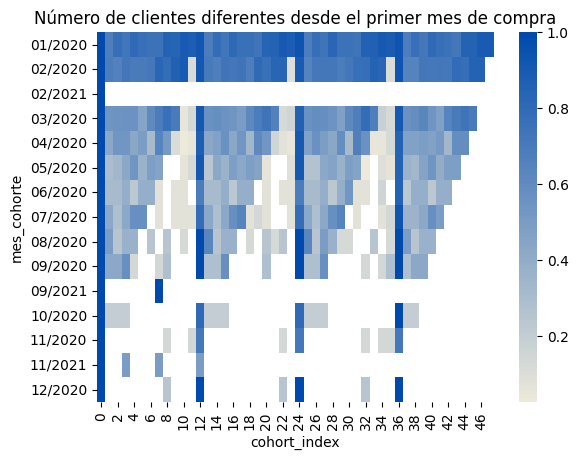

In [119]:
sns.heatmap(
    cohortes_fecha,
    cmap = cmap,
    center = 0,
    vmax = 1
)
plt.title('Número de clientes diferentes desde el primer mes de compra')

In [120]:
cohortes_fecha = (
    df
    .pivot_table(
        index = 'mes_cohorte',
        columns = 'cohort_index',
        values = 'id_del_cliente',
        aggfunc = 'count'
    )
)
cohortes_fecha = cohortes_fecha.divide(cohortes_fecha[0],axis=0)
cohortes_fecha.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mes_cohorte,,,,,,,,,,,,,,,,,,,,,
01/2020,1.0,0.580057,0.735424,0.631294,0.796709,0.765570,0.836904,0.682752,1.115283,1.377319,...,0.742712,0.624890,0.815150,0.737522,0.859761,0.687500,1.097946,1.370583,1.914090,1.40879
02/2020,1.0,0.778406,0.540360,0.830334,0.951671,0.776864,1.001028,1.149100,1.209769,1.755784,...,0.545501,0.799486,0.907969,0.752699,0.975321,1.196401,1.225707,1.762982,1.501285,NaN
02/2021,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/2020,1.0,0.558798,0.507515,0.809903,0.689655,0.633068,0.838196,1.157383,1.666667,1.293546,...,0.523431,0.841733,0.768347,0.639257,0.835544,1.163572,1.594164,1.285588,NaN,NaN
04/2020,1.0,0.364179,0.743284,1.131343,0.776119,0.614925,0.495522,0.832836,0.997015,0.017910,...,0.743284,1.155224,0.847761,0.698507,0.489552,0.752239,0.931343,NaN,NaN,NaN


Text(0.5, 1.0, 'Número de compras desde el primer mes de compra')

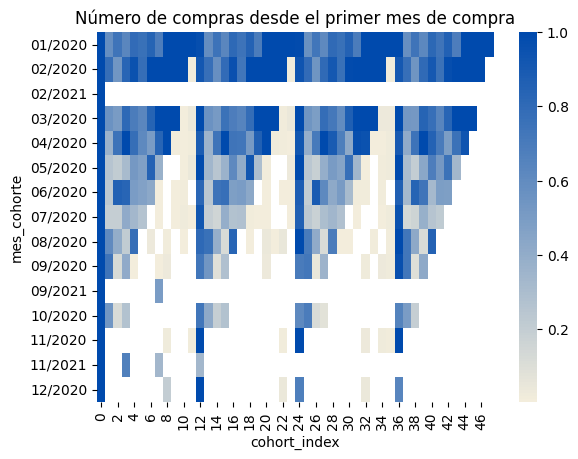

In [121]:
sns.heatmap(
    cohortes_fecha,
    cmap = cmap,
    center = 0,
    vmax = 1
)
plt.title('Número de compras desde el primer mes de compra')

In [132]:
cohortes_fecha = (
    df
    .pivot_table(
        index = 'mes_cohorte',
        columns = 'cohort_index',
        values = 'total',
        aggfunc = 'mean'
    )
)
cohortes_fecha = cohortes_fecha.divide(cohortes_fecha[0],axis=0)
cohortes_fecha.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mes_cohorte,,,,,,,,,,,,,,,,,,,,,
01/2020,1.0,0.725463,0.779235,0.659796,0.790945,0.586047,0.725331,0.826683,0.904433,0.665361,...,0.736304,0.614282,0.728547,0.451214,0.648046,0.721967,0.813455,0.829226,0.777050,0.658501
02/2020,1.0,1.295821,1.147092,1.312221,1.588541,0.728655,1.172613,1.295554,1.609348,1.038414,...,1.127638,0.836488,1.505139,1.377634,1.179151,1.471947,1.550501,1.063970,1.099096,NaN
02/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/2020,1.0,0.821432,1.425886,1.005183,1.034167,1.014843,1.040856,1.025678,1.036516,0.973638,...,0.821044,0.945741,0.759066,0.818040,1.141826,1.112916,0.999049,0.951153,NaN,NaN
04/2020,1.0,1.144370,0.745987,0.807438,2.067137,0.912690,1.417184,0.878303,3.106083,-1.845725,...,0.576349,0.884753,0.874586,0.973519,2.328424,0.779900,0.788727,NaN,NaN,NaN


Text(0.5, 1.0, 'Media del total de la factura')

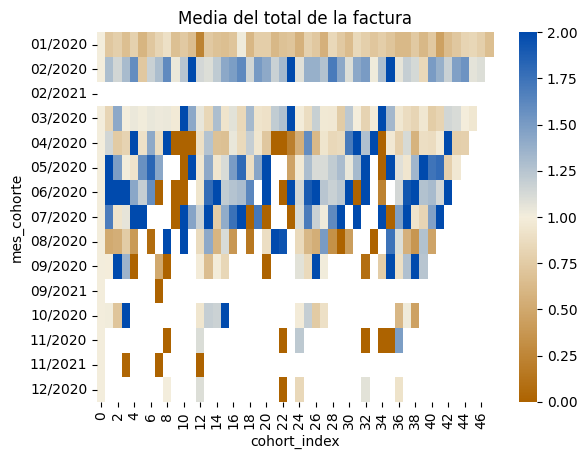

In [133]:
sns.heatmap(
    cohortes_fecha,
    cmap = cmap,
    center = 1,
    vmax = 2,
    vmin = 0
)
plt.title('Media del total de la factura')

In [134]:
cohortes_fecha = (
    df
    .pivot_table(
        index = 'mes_cohorte',
        columns = 'cohort_index',
        values = 'n_compras',
        aggfunc = 'mean'
    )
)
cohortes_fecha = cohortes_fecha.divide(cohortes_fecha[0],axis=0)
cohortes_fecha.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mes_cohorte,,,,,,,,,,,,,,,,,,,,,
01/2020,1.0,0.579279,0.623649,0.635700,0.630186,0.829239,0.939392,0.586202,0.890932,1.237838,...,0.659974,0.596174,0.656800,0.766134,0.920336,0.623770,0.870993,1.134149,1.608407,1.563752
02/2020,1.0,1.174586,0.772537,1.241535,1.460828,1.350071,1.359871,1.522553,1.503505,2.650865,...,0.770446,1.145897,1.327046,1.207977,1.367254,1.625620,1.596150,2.635978,3.091854,NaN
02/2021,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/2020,1.0,0.882300,0.619167,1.058517,1.233089,1.336231,1.269286,1.560122,2.654420,3.648997,...,0.605069,1.191402,1.398387,1.159700,1.165445,1.574386,2.643479,4.034665,NaN,NaN
04/2020,1.0,0.449621,1.396426,2.956310,2.219293,0.907859,1.132377,0.842780,4.776203,0.079637,...,1.571435,3.021876,2.215809,1.006282,1.304101,0.705733,4.436074,NaN,NaN,NaN


Text(0.5, 1.0, 'Media de compras por clientes dentro del mes')

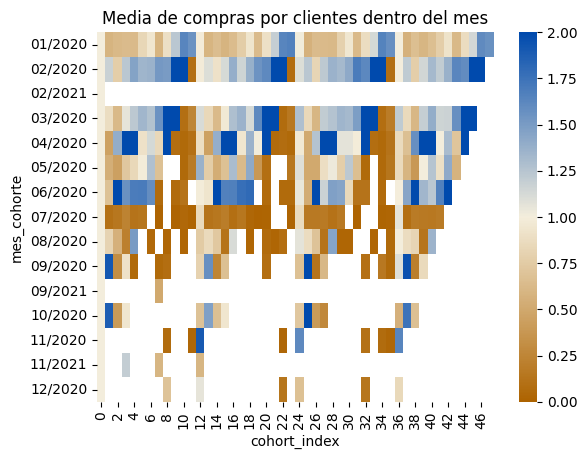

In [135]:
sns.heatmap(
    cohortes_fecha,
    cmap = cmap,
    center = 1,
    vmax = 2,
    vmin = 0
)
plt.title('Media de compras por clientes dentro del mes')

### Agrupación por ciudad

In [86]:
cohortes_ciudad = (
    df
    .pivot_table(
        index = 'ciudad',
        columns = 'cohort_index',
        values = 'id_del_cliente',
        aggfunc = 'nunique'
    )
)
cohortes_ciudad = cohortes_ciudad.divide(cohortes_ciudad[0],axis=0)
cohortes_ciudad.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
ciudad,,,,,,,,,,,,,,,,,,,,,
ALCALÁ DE HENARES,1.0,0.734940,0.746988,0.710843,0.771084,0.734940,0.759036,0.722892,0.783133,0.807229,...,0.746988,0.722892,0.746988,0.710843,0.759036,0.722892,0.807229,0.783133,0.734940,0.542169
ALICANTE,1.0,0.550725,0.637681,0.666667,0.666667,0.695652,0.681159,0.681159,0.753623,0.594203,...,0.608696,0.666667,0.637681,0.695652,0.652174,0.623188,0.695652,0.579710,0.637681,0.449275
AVILÉS,1.0,0.675676,0.716216,0.743243,0.729730,0.608108,0.662162,0.689189,0.797297,0.770270,...,0.743243,0.743243,0.743243,0.608108,0.702703,0.702703,0.797297,0.716216,0.648649,0.486486
BARCELONA,1.0,0.602564,0.743590,0.666667,0.679487,0.705128,0.730769,0.743590,0.769231,0.730769,...,0.705128,0.641026,0.628205,0.666667,0.705128,0.628205,0.743590,0.756410,0.705128,0.602564
CASTELLÓN,1.0,0.621053,0.600000,0.663158,0.652632,0.578947,0.631579,0.600000,0.715789,0.736842,...,0.589474,0.589474,0.684211,0.610526,0.631579,0.589474,0.684211,0.747368,0.610526,0.536842


<Axes: xlabel='cohort_index', ylabel='ciudad'>

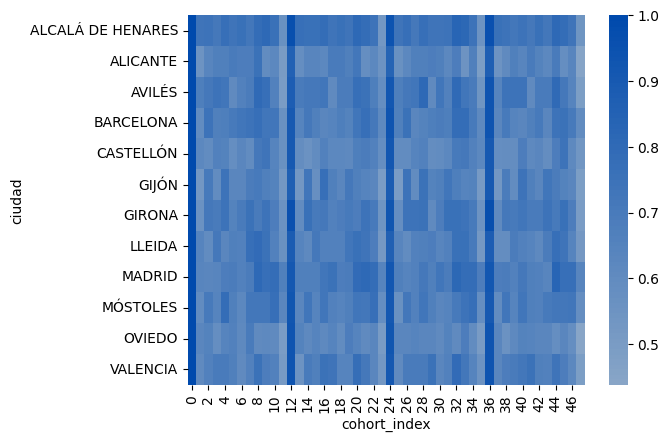

In [87]:
sns.heatmap(
    cohortes_ciudad,
    cmap = cmap,
    center = 0,
    vmax = 1
)

In [105]:
cohortes_ciudad = (
    df
    .pivot_table(
        index = 'ciudad',
        columns = 'cohort_index',
        # values = 'id_del_cliente',
        aggfunc = 'size'
    )
)
cohortes_ciudad = cohortes_ciudad.divide(cohortes_ciudad[0],axis=0)
cohortes_ciudad.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
ciudad,,,,,,,,,,,,,,,,,,,,,
ALCALÁ DE HENARES,1.0,0.749551,0.692998,0.649013,0.879713,0.795332,0.786355,0.814183,1.492819,1.190305,...,0.675943,0.686715,0.920108,0.819569,0.776481,0.846499,1.451526,1.211849,1.728905,1.008079
ALICANTE,1.0,0.550706,0.869063,0.807445,0.910141,0.584082,0.948652,0.591784,0.998716,1.154044,...,0.867779,0.851091,0.899872,0.560976,0.938383,0.614891,1.019255,1.241335,1.037227,1.134788
AVILÉS,1.0,0.387262,0.478770,0.557101,0.600293,0.376281,0.434114,0.595900,0.670571,1.051977,...,0.470717,0.538799,0.582723,0.343338,0.442167,0.632504,0.590776,1.017570,1.079063,0.467789
BARCELONA,1.0,0.373559,0.594927,0.503459,0.596464,0.906226,0.695619,0.583397,0.968486,0.984627,...,0.619523,0.497310,0.564950,0.876249,0.678709,0.569562,0.959262,1.015373,1.358186,0.927748
CASTELLÓN,1.0,0.567965,0.472447,0.531227,0.696547,0.737693,0.620132,0.601763,0.819251,1.155033,...,0.474651,0.478325,0.652461,0.616458,0.643644,0.594416,0.774431,1.146216,1.354886,0.839824


<Axes: xlabel='cohort_index', ylabel='ciudad'>

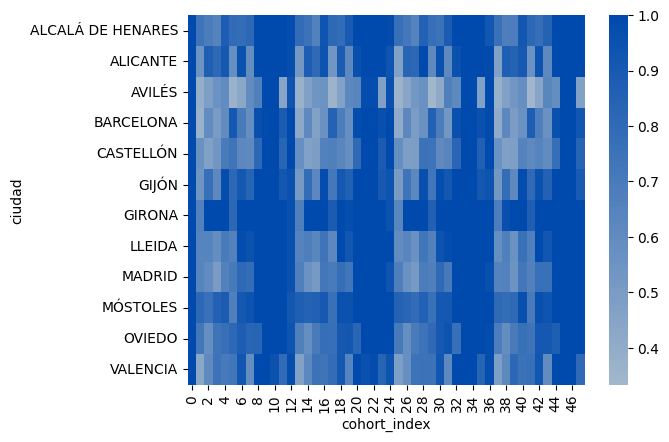

In [106]:
sns.heatmap(
    cohortes_ciudad,
    cmap = cmap,
    center = 0,
    vmax = 1
)

In [111]:
cohortes_ciudad = (
    df
    .pivot_table(
        index = 'ciudad',
        columns = 'cohort_index',
        values = 'total',
        aggfunc = 'mean'
    )
)
cohortes_ciudad = cohortes_ciudad.divide(cohortes_ciudad[0],axis=0)
cohortes_ciudad.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
ciudad,,,,,,,,,,,,,,,,,,,,,
ALCALÁ DE HENARES,1.0,1.038839,0.968523,1.032961,0.887043,1.097882,1.627060,1.460055,1.016173,0.878586,...,0.922363,1.169304,0.934917,0.914001,1.148488,1.311448,1.054123,0.859450,1.056904,0.358823
ALICANTE,1.0,1.062109,1.731589,1.055886,1.121791,1.916255,1.089018,1.853149,1.676909,1.391820,...,1.967800,1.109022,1.311897,2.009622,1.145273,1.682356,1.806416,1.580460,1.379606,1.593484
AVILÉS,1.0,1.260246,1.356487,0.907458,1.358392,1.006278,1.032886,0.835444,1.291228,0.942861,...,1.425876,0.994337,1.218350,0.953442,1.097093,1.011157,1.113832,0.652501,1.109300,1.238773
BARCELONA,1.0,0.846407,1.069653,1.603147,2.017061,0.799526,1.093237,1.173581,1.098250,0.959978,...,1.524284,0.991571,1.576740,0.705376,0.857822,0.305884,0.923204,1.102181,0.902996,1.083537
CASTELLÓN,1.0,0.878293,1.753588,0.895898,1.414954,1.045560,0.940038,0.839906,1.542546,0.908517,...,0.579606,0.770764,0.807724,1.163434,0.988030,0.652573,1.067602,0.861730,0.945422,0.790551


<Axes: xlabel='cohort_index', ylabel='ciudad'>

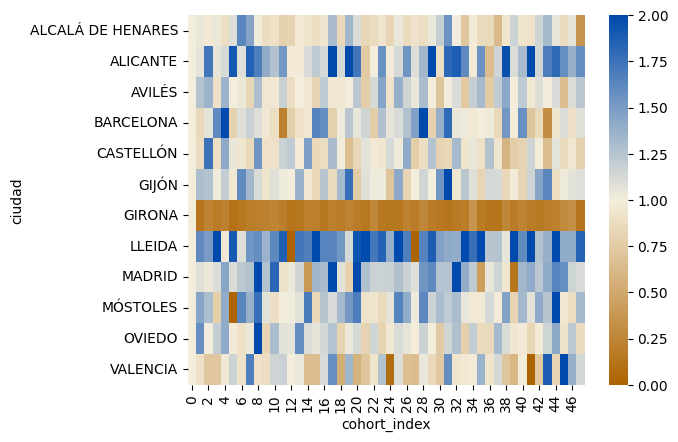

In [116]:
sns.heatmap(
    cohortes_ciudad,
    cmap = cmap,
    center = 1,
    vmax = 2,
    vmin = 0
)

In [136]:
cohortes_ciudad = (
    df
    .pivot_table(
        index = 'ciudad',
        columns = 'cohort_index',
        values = 'n_compras',
        aggfunc = 'mean'
    )
)
cohortes_ciudad = cohortes_ciudad.divide(cohortes_ciudad[0],axis=0)
cohortes_ciudad.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
ciudad,,,,,,,,,,,,,,,,,,,,,
ALCALÁ DE HENARES,1.0,0.563999,0.529771,0.574122,0.653828,0.659723,0.869997,0.605309,1.444195,0.750839,...,0.472094,0.587962,0.687463,0.621942,0.822109,0.636711,1.461951,0.778029,1.355413,1.636060
ALICANTE,1.0,0.610274,1.142583,0.800831,1.088330,0.519201,1.069658,0.584682,0.924581,1.481373,...,1.085290,0.825420,1.078185,0.552970,0.923217,0.830875,1.000095,1.621838,0.985489,2.423654
AVILÉS,1.0,0.407315,0.469183,0.870370,0.549282,0.391934,0.473904,0.826533,0.661112,1.695682,...,0.580961,0.753018,0.529863,0.393687,0.441867,0.884484,0.607972,1.520431,1.340295,1.157038
BARCELONA,1.0,0.393378,0.479705,0.450631,0.566185,1.523559,0.598838,0.487786,0.998013,0.653062,...,0.523426,0.456042,0.573964,1.194324,0.631778,0.468154,0.980938,0.664783,1.610787,1.134764
CASTELLÓN,1.0,0.641238,0.480935,0.581811,0.721891,0.806663,0.667994,0.634916,1.549743,1.448164,...,0.512042,0.527053,0.770390,0.691192,0.718731,0.735323,1.413297,1.553157,2.063460,1.755606


<Axes: xlabel='cohort_index', ylabel='ciudad'>

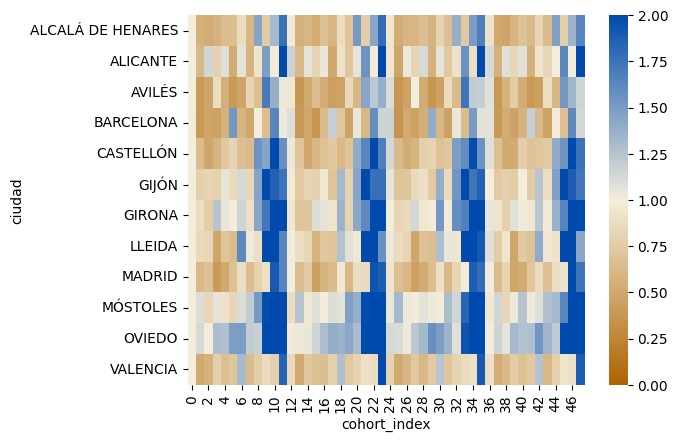

In [137]:
sns.heatmap(
    cohortes_ciudad,
    cmap = cmap,
    center = 1,
    vmax = 2,
    vmin = 0
)

In [145]:
cohortes_ciudad = (
    df
    .pivot_table(
        index = 'ciudad',
        columns = 'cohort_index',
        values = 'n_compras',
        aggfunc = 'mean'
    )
)
cohortes_ciudad = cohortes_ciudad.divide(cohortes_ciudad.shift(axis=1))

Text(0.5, 1.0, 'Variación de número de compras con respecto al mes anterior')

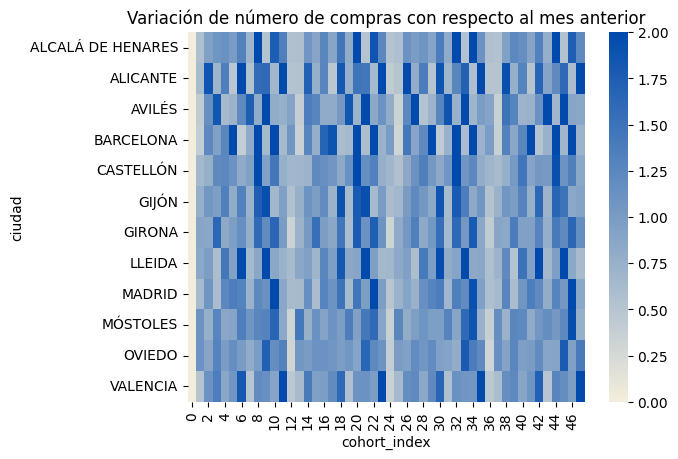

In [154]:
sns.heatmap(
    cohortes_ciudad.fillna(0),
    cmap = cmap,
    center = 0,
    vmax = 2
)
plt.title('Variación de número de compras con respecto al mes anterior')